In [1]:
import numpy as np
import os
import cv2
from skimage.io import imsave, imread
import pandas as pd
from tkinter.filedialog import askdirectory
from ultralytics import YOLO
import matplotlib.pyplot as plt

/Users/aseemjain/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
def yolov8(): ## Load YOLOv8 models for stria and cochlea detetion 
    model_stria=YOLO("striadetect.pt")
    model_cochlea=YOLO("cochlea.pt")
    return model_stria, model_cochlea

In [3]:
def calccenter(vals):
    xcenter=round(vals[0])
    ycenter=round(vals[1])
    return xcenter,ycenter

In [4]:
def batchprocess(loc,loc1,loc2,loc3,loc4,model1,model2): #Generates 256x256 patches of the stria based on pre=processed images
    cochval_val=[]
    images=[]
    rectstotal=[]
    filenameslist=[]
    dir_list = os.listdir(loc)
    rawimagesize=7000 #change this based on the size of the cochlea square_full images
    for x in dir_list:
        if((x[-4:] != '.png') | (x=='.tiff.png')|(x[0:2]=='._')):
            continue
        filename=loc+x
        im=imread(filename)
        image_rescaled=im
        #image_rescaled = cv2.resize(im,(2048,2048), interpolation = cv2.INTER_AREA) #ensure that the size is correct
        predictions=model1.predict(filename)
        rects=[]
        predictions=predictions[0].cpu().numpy()
        for r in predictions:
            if(r.boxes.cls[0]==1):
                continue
            vals=r.boxes.xywh[0]
            x_val,y_val=calccenter(vals)
            locdata=[x,x_val,y_val]
            cochval_val.append(locdata)
            rects.append([x_val,y_val,512,512])
    
        images.append(image_rescaled)
        rectstotal.append(rects)
        filenameslist.append(x)
    df = pd.DataFrame(cochval_val)
    df.to_csv('cochloc.csv')
    for x in cochval_val: 
        name=x[0]
        filename=loc1+name[:-4]+'.tiff'
        filenameexp=loc2+name[:-4]+'.tiff'
        filenameexp_comp=loc3+name

        im = imread(filename)
        xnew=round(x[1]*14000/2048)
        ynew=round(x[2]*14000/2048)
        try:
            cochim=im[ynew-round(rawimagesize/2):ynew+round(rawimagesize/2),xnew-round(rawimagesize/2):xnew+round(rawimagesize/2),:]
            image_cochscale = cv2.resize(cochim,(2048,2048), interpolation = cv2.INTER_AREA)
            #plt.imshow(image_cochscale)
            imsave(filenameexp, cochim)
            imsave(filenameexp_comp,image_cochscale)
            print(x)
        except:
            print('didnt work'+name)
    dir_list1 = os.listdir(loc3)
    stria_val=[]
    for x in dir_list1:
        if((x[-4:] != '.png') | (x[0:2]=='._')):
            print(x)
            continue
        filename=loc3+x
        im=imread(filename)
        image_rescaled = cv2.resize(im,(2048,2048), interpolation = cv2.INTER_AREA)
        predictions=model2.predict(image_rescaled)
        predictions=predictions[0].cpu().numpy()
        for r in predictions:
            vals=r.boxes.xywh[0]
            x_val,y_val=calccenter(vals)
            locdata=[x,x_val,y_val]
            stria_val.append(locdata)
    df = pd.DataFrame(stria_val)
    df.to_csv('strialoc.csv')
    count=0
    for x in stria_val: 
        name=x[0]
        filenamefull=loc2+name[:-4]+'.tiff'
        striafile=loc4+str(count)+name
        im = imread(filenamefull)
        ynew=round(x[1]*rawimagesize/2048)
        xnew=round(x[2]*rawimagesize/2048)
        
        try:
            striaim=im[xnew-256:xnew+256,ynew-256:ynew+256,:]
            count=count+1
            #plt.imshow(striaim)
            imsave(striafile, striaim)
            print(x)
        except:
            print('didnt work'+name)


image 1/1 /cis/home/ajain36/my_documents/Results/compressedfull/Image_R149_02.vsi - 20x_BF_02.png: 2048x2048 1 Cochlea-nerve, 1 Nerve, 70.4ms
Speed: 15.6ms preprocess, 70.4ms inference, 20.7ms postprocess per image at shape (1, 3, 2048, 2048)

image 1/1 /cis/home/ajain36/my_documents/Results/compressedfull/Image_R188_01.vsi - 20x_BF_01.png: 2048x2048 1 Cochlea-nerve, 1 Nerve, 69.9ms
Speed: 18.8ms preprocess, 69.9ms inference, 20.8ms postprocess per image at shape (1, 3, 2048, 2048)


['Image_R149_02.vsi - 20x_BF_02.png', 675, 702]
['Image_R188_01.vsi - 20x_BF_01.png', 704, 798]



0: 2048x2048 6 Strias, 69.6ms
Speed: 19.4ms preprocess, 69.6ms inference, 9.7ms postprocess per image at shape (1, 3, 2048, 2048)

0: 2048x2048 5 Strias, 70.8ms
Speed: 21.1ms preprocess, 70.8ms inference, 20.6ms postprocess per image at shape (1, 3, 2048, 2048)


['Image_R149_02.vsi - 20x_BF_02.png', 979, 708]
['Image_R149_02.vsi - 20x_BF_02.png', 1357, 924]
['Image_R149_02.vsi - 20x_BF_02.png', 1443, 1157]
['Image_R149_02.vsi - 20x_BF_02.png', 641, 1025]
['Image_R149_02.vsi - 20x_BF_02.png', 1312, 760]
['Image_R149_02.vsi - 20x_BF_02.png', 888, 849]
['Image_R188_01.vsi - 20x_BF_01.png', 1345, 635]
['Image_R188_01.vsi - 20x_BF_01.png', 767, 744]
['Image_R188_01.vsi - 20x_BF_01.png', 467, 1010]
['Image_R188_01.vsi - 20x_BF_01.png', 1546, 860]
['Image_R188_01.vsi - 20x_BF_01.png', 941, 581]
done


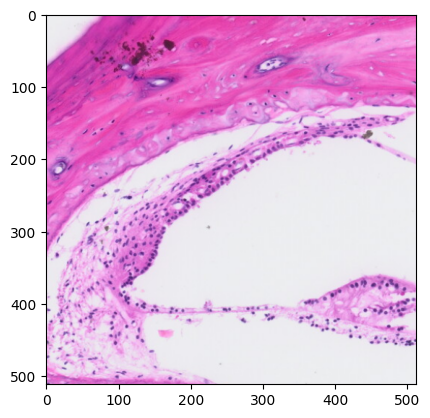

In [17]:
####### RUN THIS BLOCK ##########
saveresults=askdirectory() 
compressed_full=saveresults+"/compressedfull/"  #Location of compressed(2048x2048) square full image of WSI
squarefull=saveresults+"/full/"#Location of high resolution(14000x14000) square full image of WSI
cochleafull=saveresults+"/cochlea/" #Location of high resolution(7000x7000) square full image of Cochlea
compressed_cochlea=saveresults+"/compressedcochlea/"#Location of compressed(2048x2048) square full image of Cochlea
stria_loc=saveresults+"/stria/" #Location of 256x256 Stria patches 

model_stria, model_cochlea=yolov8()
batchprocess(compressed_full,squarefull,cochleafull,compressed_cochlea,stria_loc,model_cochlea,model_stria)
print("done")